<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> IFTA: Test campo lejano</font>
</div>

- **Para**: SLM

- **Fecha**: 2021/11/11
        
- **Autores**: 
    - Luis Miguel Sánchez Brea
    

- **Objetivos**: Here we see an implementation of Gerchberg-Saxton Algorithm using Diffractio module.


- **Descripción** Ya que el algoritmo IFTA es convergente, esto querría decir, en el nuevo marco, que las distancias entre los campos inversos y los puntos de fabricabilidad son cada vez más cercanos. Veamos si es cierto

- **Referencias**: 

R. W. Gerchberg and W. O. Saxton, “A Practical Algorithm for the Determination of Phase from Image and Diffraction Plane Pictures,” Optik (Stuttg)., vol. 35, no. 2, pp. 237–246, 1972. 



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from copy import deepcopy

In [3]:
from diffractio import um, mm, nm, np, sp, plt
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from py_aocg.ifta.algorithms import GS_scalar_far, GS_scalar_Fresnel 
from py_aocg.ifta.parameters import RMSE, make_binary, verify_mask

number of processors: 8
total memory        : 15.5 Gb
available memory    : 56 %
max frequency       : 3100 GHz
py_aocg
number of processors: 8
total memory        : 15.5 Gb
available memory    : 56 %
max frequency       : 3100 GHz


In [4]:
size=0.25*mm
num_x=num_y=256
wavelength=0.6328*um

num_steps=50

x=np.linspace(-size/2, size/2, num_x)
y=np.linspace(-size/2, size/2, num_y)

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7fb7a4000250>)

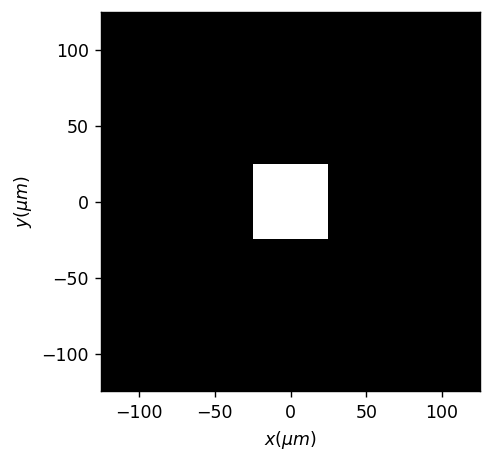

In [5]:
target=Scalar_mask_XY(x,y,wavelength)
target.square(r0=(0,0), size=50*um, angle=0)
target.draw()

In [12]:
source=Scalar_source_XY(x,y,wavelength)
source.plane_wave()

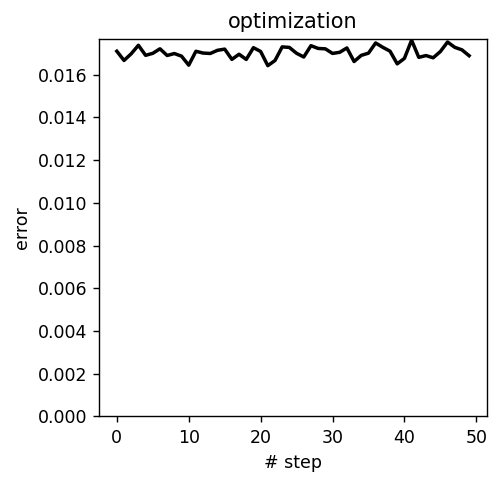

In [7]:
DOE_continuous, mask_continuous, errors = GS_scalar_far( source,target, kind='phase', is_binary=False,
                             num_steps=num_steps, has_draw=True)

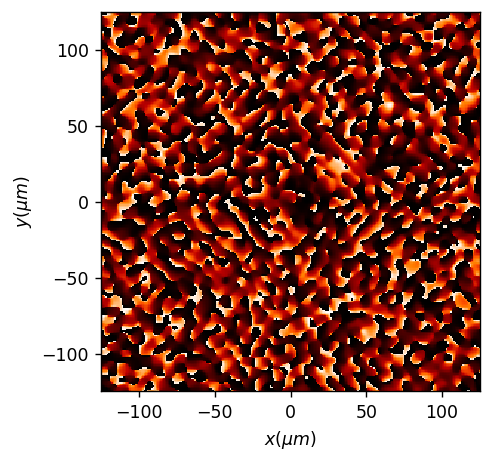

In [8]:
mask_continuous.draw('intensity');

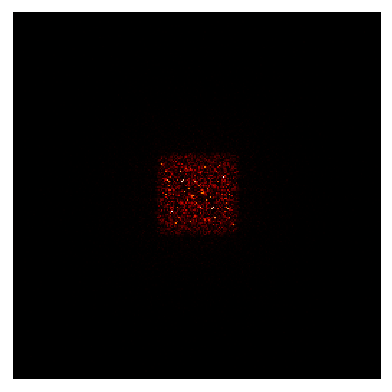

In [11]:
verify_mask(mask_continuous, z=None, has_pupil=False, is_phase=True, is_binary=False, has_draw=True);